# part 1
## data imports 

In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv('filtered_data.csv')
%run all_functions_modeling.ipynb
df.head(5)


/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_fr

,owner name,sbl,consideration,doc type,deed page(search parcel),deed page(public records),date(public records),date(search parcel),Neighborhood,Location,Actual Date,more than one doc type
1,THEN ANDREW J,123.79-1-1,"$45,000.00",D1A,11138/0710,11138/710,12/4/2007 15:27:53,12/4/2007,Hopkins-Tifft,"(42.8565808931454, -78.8250857756282)",2007-12-04 00:00:00,False
7,CHUKWUENEKA KAMAU,101.49-2-62,"$11,310.00",DEED,11206/5883,11206/5883,8/1/2011 14:28:23,8/1/2011,Genesee-Moselle,"(42.91182584111316, -78.81336114920062)",2011-08-01 00:00:00,False
8,VICKERS KALEEM,101.49-2-62,"$74,000.00",DEED,11317/7753,11317/7753,8/24/2017 16:04:53,8/24/2017,Genesee-Moselle,"(42.91182584111316, -78.81336114920062)",2017-08-24 00:00:00,False
14,PEZZINO JAMES R,89.36-1-5,"$47,000.00",D1B,10952/2888,10952/2888,6/1/1999 4:43:41,6/1/1999,Parkside,"(42.93903680628341, -78.84199297005806)",1999-06-01 00:00:00,False
15,ROMEO DOMENIC P,89.36-1-5,"$176,500.00",DEED,11320/2909,11320/2909,10/18/2017 13:42:39,10/18/2017,Parkside,"(42.93903680628341, -78.84199297005806)",2017-10-18 00:00:00,False


In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv('filtered_data.csv')
df.head(5)
# data filteration 
df = df[df['doc type'].isin(['D1A','DEED','D1B','D1BU'])]
# remove nan 
series = df['Location'].apply(lambda x : x.split(',')[0][1:] if x == x  else np.nan).apply(lambda x: '-' in x if x == x else np.nan)
index_of_faulty_locations = df[series == True].index
new_vals = df.loc[index_of_faulty_locations]['Location'].apply(lambda x : '(' + x.split(',')[1][:-1] + ',' + x.split(',')[0][1:] + ')')
df.at[index_of_faulty_locations,'Location'] = new_vals
new_df = df[~df['Location'].isna()].copy() # remove NaN locations 
gdf,years_list, months_list = geopandas_formulation(new_df)
gdf_unique_houses = gdf.drop_duplicates('sbl')['geometry']

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


In [132]:
gdf['year'].unique()

array([2007., 2011., 2017., 1999., 2003., 2009., 2013., 2016., 2014.,
       1998., 2004., 2008., 2015., 1994., 2018., 2020., 2002., 2012.,
       1997., 2019., 2006., 1995., 2000., 2005., 2010., 1996., 2001.,
       1903., 1990., 1901., 1919., 1950., 1941., 1904., 1910., 1993.,
       1939., 1909., 1969., 1908.,   nan, 1906., 1988., 1930., 1907.,
       1964., 1970., 1900., 1992., 1981.])

In [3]:
# geopandas formulation 
gdf,years_list, months_list = geopandas_formulation(new_df) # months list becomes a tuple 

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


In [4]:
print(len(months_list))
print(len(years_list))

353
49


In [5]:
shortened_months_list = {}
for key,pair in months_list.items():
    if key[0] > 2005:
        shortened_months_list[key] = pair
len(shortened_months_list)

175



# the old ranges 
for key,pair in months_list.items():
    if key[0] > 2016:
        shortened_months_list[key] = pair
len(shortened_months_list)
//---------------------------------------------
six_month_lists --> pd.date_range(start="2010-12-31",end="2021-06-01", freq='6M'):
three_months_lists --> pd.date_range(start="2014-12-31",end="2021-06-01", freq='3M'):

In [10]:
old_date = None
six_month_lists = {}
counter = 0
for date_range in pd.date_range(start="2000-12-31",end="2019-12-31", freq='2Y'):
    if old_date == None:
        old_date = date_range 
    else:
        new_key = str(old_date.year) + '-' + str(date_range.year) 
        time_slice = gdf[gdf['Actual Date'] > old_date][gdf['Actual Date'] < date_range]
        six_month_lists[new_key] = time_slice
        old_date = date_range
len(six_month_lists)
    

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


9

In [3]:
# 2 year stuff 
old_date = None
two_year_list = {}
counter = 0
two_years_list_proper = pd.date_range(start="2000-12-31",end="2019-12-31", freq='2Y').to_list() + pd.date_range(start="2001-12-31",end="2018-12-31", freq='2Y').to_list()
for date_range in two_years_list_proper:

    if old_date == None:
        old_date = date_range 
    elif old_date.year == 2018: # the that shouldn't happen 
        old_date = date_range
        continue 
    else:
        
        new_key = str(old_date.year) + '-' + str(date_range.year) 
        print(new_key)
        counter += 1 
        time_slice = gdf[gdf['Actual Date'] > old_date][gdf['Actual Date'] < date_range]
        two_year_list[new_key] = time_slice
        old_date = date_range
print(counter)
len(two_year_list)

2000-2002
2002-2004
2004-2006
2006-2008
2008-2010
2010-2012
2012-2014
2014-2016
2016-2018
2001-2003
2003-2005


/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


2005-2007
2007-2009
2009-2011
2011-2013
2013-2015
2015-2017
17


17

In [13]:
two_year_list.keys()

dict_keys(['2000-2002', '2002-2004', '2004-2006', '2006-2008', '2008-2010', '2010-2012', '2012-2014', '2014-2016', '2016-2018', '2001-2003', '2003-2005', '2005-2007', '2007-2009', '2009-2011', '2011-2013', '2013-2015', '2015-2017'])

In [14]:
two_year_list

{'2000-2002':                        owner name          sbl  consideration doc type  \
 128                HARRIS HAZEL L    90.37-8-4         2525.0      D1B   
 257           A R GRAND HONOR INC   99.35-1-10         7500.0      D1B   
 278            MCDUFFIE GERALINDA    90.63-1-3        10000.0      D1B   
 308                  JONES ESTHER   99.58-3-15        14900.0      D1B   
 457               RUFFLES SUSAN A   78.41-5-16        34000.0      D1B   
 ...                           ...          ...            ...      ...   
 320100              ABELL JAMES J  123.81-4-25        13301.0      D1B   
 320213  COMMONWEALTH PROPERTIES L  111.58-2-23          720.0      D1B   
 320308                 MACK DAVID   101.65-8-4         8000.0      D1B   
 320384     MATHEWSON CHARLES P JR   77.32-5-28        43000.0      D1B   
 320433   CHAPMAN SUBRENEA/MCGEE G  89.44-3-3.1         2000.0      D1B   
 
        deed page(search parcel) deed page(public records)  \
 128                  1

In [6]:
import pandas as pd 
pd.date_range(start="2000-12-31",end="2019-12-31", freq='2Y')


DatetimeIndex(['2000-12-31', '2002-12-31', '2004-12-31', '2006-12-31',
               '2008-12-31', '2010-12-31', '2012-12-31', '2014-12-31',
               '2016-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='2A-DEC')

(2000-12-31, 2002-12-31]    0.0
(2002-12-31, 2004-12-31]    1.0
(2004-12-31, 2006-12-31]    0.0
(2006-12-31, 2008-12-31]    1.0
(2008-12-31, 2010-12-31]    0.0
(2010-12-31, 2012-12-31]    0.0
(2012-12-31, 2014-12-31]    0.0
(2014-12-31, 2016-12-31]    0.0
(2016-12-31, 2018-12-31]    0.0

In [7]:
old_date = None
three_month_lists = {}
counter = 0
for date_range in pd.date_range(start="2014-12-31",end="2021-06-01", freq='3M'):
    if old_date == None:
        old_date = date_range 
    else:
        new_key = str(old_date.year) +  ',' + str(old_date.month) + '-' + str(date_range.year) +  ',' + str(date_range.month)
        time_slice = gdf[gdf['Actual Date'] > old_date][gdf['Actual Date'] < date_range]
        three_month_lists[new_key] = time_slice
        old_date = date_range
len(three_month_lists)

25

In [ ]:
pd.date_range(start="2011-12-31",end="2021-06-01", freq='1M')

In [8]:
sample = pd.date_range(start="2011-12-31",end="2021-06-01", freq='6M')[0]

In [76]:
gdf_unique_houses = gdf.drop_duplicates('sbl')['geometry']
cell, grid_cells, matrix_cells, indexes, cell_size = cell_formation(gdf_unique_houses, n_cells = 2)
print("THE CELL SIZES ARE:" + str(cell_size))

THE CELL SIZES ARE:6098.2575478041545


In [5]:
# weights formulation 
mat_contig, w = weights_formation(cell,indexes,kmax = 8)

In [6]:
total_matrix = total_matrix_allocation(matrix_cells,gdf_unique_houses)
matrix_transaction, matrix_non_transaction, list_years_mt = matrix_transaction_allocation(years_list, total_matrix)
matrix_percentages = matrix_percentages_allocation(matrix_transaction,total_matrix)
matrix_median_prices, list_years_mmp = matrix_median_prices_allocation(years_list)

running matrix median prices allocation
year:1900.0
1.0


In [1]:
gdf_unique_houses

NameError: name 'gdf_unique_houses' is not defined

In [18]:
x = np.array([])
x = np.append(x,1)
new_x  = np.append(gdf,1)
new_x

array(['THEN ANDREW J', '123.79-1-1', 45000.0, ..., 2017.0, 7.0, 1],
      dtype=object)

0

In [10]:
import pandas as pd 
pd.read_csv('hello.csv')

,Unnamed: 0,owner name,sbl,consideration,doc type,deed page(search parcel),deed page(public records),date(public records),date(search parcel),Neighborhood,Location,Actual Date,more than one doc type,geometry,year,month
0,1,THEN ANDREW J,123.79-1-1,45000.0,D1A,11138/0710,11138/710,12/4/2007 15:27:53,12/4/2007,Hopkins-Tifft,"(42.8565808931454, -78.8250857756282)",2007-12-04 00:00:00,False,POINT (-8774768.410279043 5290167.411916786),2007.0,12.0
1,7,CHUKWUENEKA KAMAU,101.49-2-62,11310.0,DEED,11206/5883,11206/5883,8/1/2011 14:28:23,8/1/2011,Genesee-Moselle,"(42.91182584111316, -78.81336114920062)",2011-08-01 00:00:00,False,POINT (-8773463.230835382 5298560.456458846),2011.0,8.0
2,8,VICKERS KALEEM,101.49-2-62,74000.0,DEED,11317/7753,11317/7753,8/24/2017 16:04:53,8/24/2017,Genesee-Moselle,"(42.91182584111316, -78.81336114920062)",2017-08-24 00:00:00,False,POINT (-8773463.230835382 5298560.456458846),2017.0,8.0
3,14,PEZZINO JAMES R,89.36-1-5,47000.0,D1B,10952/2888,10952/2888,6/1/1999 4:43:41,6/1/1999,Parkside,"(42.93903680628341, -78.84199297005806)",1999-06-01 00:00:00,False,POINT (-8776650.510553718 5302697.225885058),1999.0,6.0
4,15,ROMEO DOMENIC P,89.36-1-5,176500.0,DEED,11320/2909,11320/2909,10/18/2017 13:42:39,10/18/2017,Parkside,"(42.93903680628341, -78.84199297005806)",2017-10-18 00:00:00,False,POINT (-8776650.510553718 5302697.225885058),2017.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92519,320455,WILLIAMS LAMAR,90.41-2-4,40000.0,D1B,10974/5082,10974/5082,12/1/2000 4:19:49,12/1/2000,Kensington-Bailey,"(42.936321444132616, -78.81272410274678)",2000-12-01 00:00:00,False,POINT (-8773392.315148531 5302284.338625377),2000.0,12.0
92520,320456,BOATWRIGHT DELORES,90.41-2-4,28000.0,DEED,11305/3839,11305/3839,11/22/2016 09:12:32,11/22/2016,Kensington-Bailey,"(42.936321444132616, -78.81272410274678)",2016-11-22 00:00:00,False,POINT (-8773392.315148531 5302284.338625377),2016.0,11.0
92521,320463,SURDI JOSEPH D,77.49-1-18,75000.0,D1B,10884/5136,10884/5136,3/31/1995 11:25:38,3/31/1995,Riverside,"(42.95494703448873, -78.89975255336158)",1995-03-31 00:00:00,False,POINT (-8783080.277955497 5305116.838432795),1995.0,3.0
92522,320465,BARNES DAVID,77.49-1-18,25000.0,DEED,11216/6145,11216/6145,1/31/2012 12:46:47,1/31/2012,Riverside,"(42.95494703448873, -78.89975255336158)",2012-01-31 00:00:00,False,POINT (-8783080.277955497 5305116.838432795),2012.0,1.0


In [7]:
def vary_spatial_resolution_only_pandas(n_cells):
    cell, grid_cells, matrix_cells, indexes, cell_size = cell_formation(gdf_unique_houses, n_cells = n_cells)
    to_csvs_cells(matrix_cells,gdf,n_cells)

In [12]:
lists_results  = []
with concurrent.futures.ProcessPoolExecutor(max_workers=8) as executor:
    results = []
    for cell_size in range(2,60,2):
        f1 = executor.submit(vary_spatial_resolution_only_pandas,cell_size)
        results.append(f1)
    for f in concurrent.futures.as_completed(results):
        lists_results.append(f.result())

In [5]:
def vary_spatial_resolution(n_cells):
    cell, grid_cells, matrix_cells, indexes, cell_size = cell_formation(gdf_unique_houses, n_cells = n_cells)
    mat_contig, w = weights_formation(cell,indexes,kmax = 8)
    total_matrix = total_matrix_allocation(matrix_cells,gdf_unique_houses)
    matrix_transaction, matrix_non_transaction, list_years_mt = matrix_transaction_allocation(years_list, total_matrix)
    matrix_percentages = matrix_percentages_allocation(matrix_transaction,total_matrix)
    matrix_median_prices, list_years_mmp = matrix_median_prices_allocation(years_list)
    df_for_model = multiprocessing_feature_engineering()
    df_for_model.to_csv('csvs_to_modeling_cell_sizes/' + str(n_cells) + '_modeling.csv', index = False)
    return df_for_model 

In [ ]:
lists_results  = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = []
    for cell_size in range(6,20,2):
        f1 = executor.submit(vary_spatial_resolution,cell_size)
        results.append(f1)
    for f in concurrent.futures.as_completed(results):
        lists_results.append(f.result())

14.460186513629843
running matrix percentages allocation


In [70]:
hm = pd.read_csv('experiments2.csv')

In [73]:
hm['number of transactions'].sum()

14961437

In [62]:
hm2 = pd.read_csv('experiments.csv') # 22607952

In [74]:
hm2['number of transactions'].sum()

14961437

In [4]:
import os 
folder_list = os.listdir('updated_folder/csvs_to_modeling_cell_sizes/two_year')

In [5]:
import numpy as np
direc = 'updated_folder/csvs_to_modeling_cell_sizes/two_year/'
def vary_spatial_resolution(n_cells_list):
    n_cells, time_lists, time_per_string = n_cells_list[0],n_cells_list[1],n_cells_list[2]
    m_cells, grid_cells, matrix_cells, indexes, cell_size = cell_formation(gdf_unique_houses, n_cells = n_cells)
    #mat_contig, w = weights_formation(cell,indexes,kmax = 3)
    
    if str(n_cells) + '_transactions'+ time_per_string + '.npy' not in folder_list or \
     str(n_cells) + '_percentages' + time_per_string + '.npy' not in folder_list or \
     str(n_cells) + '_median_prices' + time_per_string +'.npy' not in folder_list or str(n_cells) + '_total.npy' not in folder_list:
        if str(n_cells) + '_total'+ '.npy' not in folder_list:
            total_matrix = total_matrix_allocation(matrix_cells,gdf_unique_houses)
            with open( 'updated_folder/csvs_to_modeling_cell_sizes/two_year/' + str(n_cells) + '_total.npy', 'wb') as f:
                np.save(f, np.array(total_matrix))
        else:
            total_matrix = np.load( direc + str(n_cells) + '_total' + '.npy' )
        # -----------------------------------------------------------------------------------------------
        if  str(n_cells) + '_transactions'+ time_per_string + '.npy' not in folder_list: 
            matrix_transaction, matrix_non_transaction, list_years = matrix_transaction_allocation(time_lists, total_matrix)
            with open( 'updated_folder/csvs_to_modeling_cell_sizes/two_year/' + str(n_cells) + '_transactions'+ time_per_string + '.npy', 'wb') as f:
                np.save(f, np.array(matrix_transaction))
        else:
            matrix_transaction = np.load( direc + str(n_cells) + '_transactions'+ time_per_string + '.npy' )
        # -----------------------------------------------------------------------------------------------
        if str(n_cells) + '_percentages' + time_per_string + '.npy' not in folder_list:
            matrix_percentages = matrix_percentages_allocation(matrix_transaction,total_matrix)
            with open( 'updated_folder/csvs_to_modeling_cell_sizes/two_year/' + str(n_cells) + '_percentages' + time_per_string + '.npy', 'wb') as f:
                np.save(f, np.array(matrix_percentages))
        else:
            matrix_percentages = np.load( direc + str(n_cells) + '_percentages' + time_per_string + '.npy' )
        # -----------------------------------------------------------------------------------------------
        if str(n_cells) + '_median_prices' + time_per_string +'.npy' not in folder_list:
            matrix_median_prices, list_years_mmp = matrix_median_prices_allocation(time_lists)
            with open( 'updated_folder/csvs_to_modeling_cell_sizes/two_year/' + str(n_cells) + '_median_prices' + time_per_string +'.npy', 'wb') as f:
                np.save(f, np.array(matrix_median_prices))
        else:
            matrix_median_prices = np.load( direc + str(n_cells) + '_median_prices' + time_per_string +'.npy' )
    # save to here ; csvs_to_modeling_cell_sizes
    #df_for_model = multiprocessing_feature_engineering()
    #df_for_model.to_csv('csvs_to_modeling_cell_sizes/' + str(n_cells) + '_modeling.csv', index = False)
    return #list_years_mmp, list_years

In [118]:
matrix_median_prices, list_years_mmp = matrix_median_prices_allocation(two_year_list)

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [6]:
arr

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  0,  1, ...,  1,  0,  1],
        [15, 13, 12, ..., 11, 18, 15],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 8,  6,  5, ..., 10,  9,  8],
        [20,  9,  5, ..., 15, 17,  9],
        [ 4,  5,  8, ...,  1,  6

In [5]:
arr = np.load('updated_folder/csvs_to_modeling_cell_sizes/two_year/' + '38' + '_percentages' + '-2_year' + '.npy')
arr

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [6]:
import pandas as pd 
%run all_functions_modeling.ipynb

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
all_functions_modeling.ipynb:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  "text": [


In [126]:
to_function_2year = (4, two_year_list, '-2_year')
vary_spatial_resolution(to_function_2year)

([(2017.0, 2018.0),
  (2017.0, 2016.0),
  (2016.0, 2015.0),
  (2014.0, 2015.0),
  (2013.0, 2014.0),
  (2013.0, 2012.0),
  (2011.0, 2012.0),
  (2011.0, 2010.0),
  (2009.0, 2010.0),
  (2009.0, 2008.0),
  (2007.0, 2008.0),
  (2007.0, 2006.0),
  (2006.0, 2005.0),
  (2004.0, 2005.0),
  (2003.0, 2004.0),
  (2003.0, 2002.0),
  (2002.0, 2001.0)],
 [(2017.0, 2018.0),
  (2017.0, 2016.0),
  (2016.0, 2015.0),
  (2014.0, 2015.0),
  (2013.0, 2014.0),
  (2013.0, 2012.0),
  (2011.0, 2012.0),
  (2011.0, 2010.0),
  (2009.0, 2010.0),
  (2009.0, 2008.0),
  (2007.0, 2008.0),
  (2007.0, 2006.0),
  (2006.0, 2005.0),
  (2004.0, 2005.0),
  (2003.0, 2004.0),
  (2003.0, 2002.0),
  (2002.0, 2001.0)])

In [131]:
two_year_list['2000-2002']['year'].unique()

array([2002., 2001.])

In [127]:
list(reversed(sorted(two_year_list, key = lambda element: (element[0], element[1]) )))

['2015-2017',
 '2013-2015',
 '2011-2013',
 '2009-2011',
 '2007-2009',
 '2005-2007',
 '2003-2005',
 '2001-2003',
 '2016-2018',
 '2014-2016',
 '2012-2014',
 '2010-2012',
 '2008-2010',
 '2006-2008',
 '2004-2006',
 '2002-2004',
 '2000-2002']

In [106]:
list_to_iter = reversed(sorted(two_year_list, key = lambda element: (element[0], element[1]) ))
list_years_in_z = []
matrix_median_prices = [[[] for x in range(len(x_range))] for y in range(len(y_range))] 
for gdf_time in list_to_iter:
    mean_consideration = two_year_list[gdf_time].groupby('sbl')['consideration'].mean().to_dict()
    gdf_sample = two_year_list[gdf_time].drop_duplicates(subset = 'sbl')
    gdf_sample['mean consideration'] = gdf_sample['sbl'].map(mean_consideration)
    year = tuple(gdf_sample['year'].unique())
    list_years_in_z.append(year)
    g_sample = gdf_sample['geometry']
    timer = 0
list_years_in_z

[(2017.0, 2016.0),
 (2014.0, 2015.0),
 (2013.0, 2012.0),
 (2011.0, 2010.0),
 (2009.0, 2008.0),
 (2007.0, 2006.0),
 (2004.0, 2005.0),
 (2003.0, 2002.0),
 (2017.0, 2018.0),
 (2016.0, 2015.0),
 (2013.0, 2014.0),
 (2011.0, 2012.0),
 (2009.0, 2010.0),
 (2007.0, 2008.0),
 (2006.0, 2005.0),
 (2003.0, 2004.0),
 (2002.0, 2001.0)]

(2002.0, 2001.0)

In [94]:
gdf_sample

,owner name,sbl,consideration,doc type,deed page(search parcel),deed page(public records),date(public records),date(search parcel),Neighborhood,Location,Actual Date,more than one doc type,geometry,year,month,mean consideration
128,HARRIS HAZEL L,90.37-8-4,2525.0,D1B,11001/9114,11001/9114,3/7/2002 2:52:56,3/7/2002,Fillmore-Leroy,"(42.93586688801116, -78.83664588024699)",2002-03-07,False,POINT (-8776055.275 5302215.222),2002.0,3.0,2525.0
257,A R GRAND HONOR INC,99.35-1-10,7500.0,D1B,10996/6030,10996/6030,1/7/2002 12:14:18,1/7/2002,Upper West Side,"(42.91648757218022, -78.89186889529316)",2002-01-07,False,POINT (-8782202.673 5299269.030),2002.0,1.0,7500.0
278,MCDUFFIE GERALINDA,90.63-1-3,10000.0,D1B,11021/6510,11021/6510,12/5/2002 3:00:28,12/5/2002,Delavan Grider,"(42.92807095697975, -78.82340965350859)",2002-12-05,False,POINT (-8774581.825 5301029.914),2002.0,12.0,10000.0
308,JONES ESTHER,99.58-3-15,14900.0,D1B,11004/5853,11004/5853,4/17/2002 1:07:23,4/17/2002,West Side,"(42.90844203278267, -78.89420418292622)",2002-04-17,False,POINT (-8782462.636 5298046.158),2002.0,4.0,14900.0
457,RUFFLES SUSAN A,78.41-5-16,34000.0,D1B,10984/0844,10984/844,6/25/2001 3:28:57,6/25/2001,North Park,"(42.9559023890682, -78.85671978097575)",2001-06-25,False,POINT (-8778289.892 5305262.148),2001.0,6.0,34000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320100,ABELL JAMES J,123.81-4-25,13301.0,D1B,11024/1040,11024/1040,12/26/2002 12:10:41,12/26/2002,Seneca-Cazenovia,"(42.85671785659752, -78.80875954722788)",2002-12-26,False,POINT (-8772950.983 5290188.211),2002.0,12.0,13301.0
320213,COMMONWEALTH PROPERTIES L,111.58-2-23,720.0,D1B,10983/6021,10983/6021,6/18/2001 2:53:55,6/18/2001,Broadway Fillmore,"(42.88615740911561, -78.85220965703404)",2001-06-18,False,POINT (-8777787.827 5294659.866),2001.0,6.0,720.0
320308,MACK DAVID,101.65-8-4,8000.0,D1B,11020/7776,11020/7776,11/27/2002 12:22:51,11/27/2002,Genesee-Moselle,"(42.90512342528541, -78.80990136837403)",2002-11-27,False,POINT (-8773078.090 5297541.797),2002.0,11.0,8000.0
320384,MATHEWSON CHARLES P JR,77.32-5-28,43000.0,D1B,11000/3838,11000/3838,2/14/2002 11:31:25,2/14/2002,Riverside,"(42.96038112277055, -78.90467498463521)",2002-02-14,False,POINT (-8783628.240 5305943.393),2002.0,2.0,43000.0


In [89]:
 gdf_sample['year']

128       2002.0
257       2002.0
278       2002.0
308       2002.0
457       2001.0
           ...  
320100    2002.0
320213    2001.0
320308    2002.0
320384    2002.0
320433    2002.0
Name: year, Length: 5973, dtype: float64

In [6]:
for cell_size in range(2,63,4):
    #to_function_six = (cell_size, six_month_lists, 'six_months')
    to_function_2year = (cell_size, two_year_list, '-2_year')
    #to_function_one = (cell_size, shortened_months_list, 'one_months')
    #f1 = executor.submit(vary_spatial_resolution,to_function_six)
    vary_spatial_resolution(to_function_2year)

running matrix median prices allocation
year:(2002.0, 2001.0)
1.0


In [ ]:
lists_results = []
with concurrent.futures.ProcessPoolExecutor(max_workers=8) as executor:
    results = []
    for cell_size in range(2,63,4):
        #to_function_six = (cell_size, six_month_lists, 'six_months')
        to_function_2year = (cell_size, two_year_list, '-2_year')
        #to_function_one = (cell_size, shortened_months_list, 'one_months')
        #f1 = executor.submit(vary_spatial_resolution,to_function_six)
        f1 = executor.submit(vary_spatial_resolution,to_function_2year)
        #f3 = executor.submit((vary_spatial_resolution,to_function_one))
        #results.append(f1)
        results.append(f1)
        #results.append(f3)
    for f in concurrent.futures.as_completed(results):
        lists_results.append(f.result())


0.0183426138224697

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]

In [47]:

from IPython.display import clear_output
def save_obj(name, obj ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name ):
    with open('celltransactions/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [111]:
4_median_prices2_year.npy

IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
import concurrent

lists_results = []
with concurrent.futures.ProcessPoolExecutor(max_workers=3) as executor:
    results = []
    for cell_size in range(5,40,5):
        
        
        f1 = executor.submit(vary_spatial_resolution,to_function_six)
       
        results.append(f1)
    for f in concurrent.futures.as_completed(results):
        lists_results.append(f.result())

In [81]:
shortened_months_list

{(2018.0,
  1.0):                                      owner name          sbl  consideration  \
 704                      PRYMONT MANAGEMENT INC  101.22-1-43         7000.0   
 1023                        MILDRED DELANCY LLC   88.74-1-11       150000.0   
 1323                          FISCHER ZACHARY M   123.78-3-4       117000.0   
 2905                                   ZEVI LLC   88.51-1-21        40000.0   
 3509                                WEST ANDREW  100.43-2-46        88000.0   
 ...                                         ...          ...            ...   
 316083             MAX FRANCES/MAYS CHRISTOPHER   78.82-1-47       285500.0   
 316242  HOLLENBECK DONALD C/DOTY P R&GANNON R M  123.77-6-20        50000.0   
 316637          RELIANCE PROPERTY SOLUTIONS LLC  101.48-5-15        10000.0   
 318092                       WOODCOCK BRANDON J   122.50-2-6        90000.0   
 318267              MCCONNELL JOHN A/PATRICIA J   133.70-2-4        20000.0   
 
        doc type deed

In [228]:
from sklearn.ensemble import RandomForestClassifier

data_frame_model = df_for_model.copy()
data_frame_model = data_frame_model[data_frame_model['total number of houses'] > 0]
data_frame_model['target'] = data_frame_model['target'] *  100
data_frame_model['new_target'] = data_frame_model['target'] > 8
print(data_frame_model['new_target'].value_counts())
target = data_frame_model[data_frame_model['year'] == 2018]
train = data_frame_model[data_frame_model['year'] < 2018]
X_train,y_train = train.drop(['target','year','new_target'], axis =1), train['new_target']
X_test, y_test = target.drop(['target','year','new_target'], axis =1 ), target['new_target']
#clf = RandomForestClassifier(n_estimators= 500, verbose = 2,n_jobs = -1)
#clf.fit(X_train,y_train)
#print(sklearn.metrics.classification_report(y_test, clf.predict(X_test)))

False    190
True     125
Name: new_target, dtype: int64


In [229]:
cell_groupings = {}
for idx,cell in enumerate(data_frame_model['cell name'].unique()):
    cell_groupings[cell] = idx+1
group_train = X_train['cell name'].map(cell_groupings)
group_test = X_test['cell name'].map(cell_groupings)
X_train.drop(['cell name'], axis =1, inplace = True, errors= 'ignore')
X_test.drop(['cell name'], axis =1, inplace = True, errors= 'ignore')

In [230]:
group_train

11     1
12     2
13     3
14     4
15     5
      ..
55    31
56    32
57    33
58    34
59    35
Name: cell name, Length: 210, dtype: int64

In [231]:
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.ensemble import RandomForestRegressor
from merf.utils import MERFDataGenerator
from merf.merf import MERF
from merf.viz import plot_merf_training_stats

In [232]:
z_train = np.column_stack([X_train['total number of houses'],group_train.values.reshape((-1,1))])
z_test = np.column_stack([X_test['total number of houses'],group_test.values.reshape((-1,1))])

In [233]:
from sklearn.ensemble import RandomForestClassifier
mrf = MERF(max_iterations=20,fixed_effects_model = RandomForestClassifier(500, n_jobs = -1))
mrf.fit(X_train, Z = z_train,clusters =  group_train, y = y_train)

INFO     [merf.py:307] Training GLL is -503.1901144125145 at iteration 1.
INFO     [merf.py:307] Training GLL is -981.7881290226328 at iteration 2.
INFO     [merf.py:307] Training GLL is -1440.761442459784 at iteration 3.
INFO     [merf.py:307] Training GLL is -1872.485049539966 at iteration 4.
INFO     [merf.py:307] Training GLL is -2297.992603242933 at iteration 5.
INFO     [merf.py:307] Training GLL is -2722.8603963129576 at iteration 6.
INFO     [merf.py:307] Training GLL is -3147.6604396127054 at iteration 7.
INFO     [merf.py:307] Training GLL is -3572.4522291793523 at iteration 8.
INFO     [merf.py:307] Training GLL is -3997.2426388265076 at iteration 9.
INFO     [merf.py:307] Training GLL is -4422.032675650614 at iteration 10.
INFO     [merf.py:307] Training GLL is -4846.822572258874 at iteration 11.
INFO     [merf.py:307] Training GLL is -5271.612404860672 at iteration 12.
INFO     [merf.py:307] Training GLL is -5696.40220368301 at iteration 13.
INFO     [merf.py:307] Training

In [234]:
prediction = mrf.predict(X_test, z_test, group_test)


In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93        15
        True       0.95      0.95      0.95        20

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35



In [237]:
data_frame_model = data_frame_model[data_frame_model['total number of houses'] > 0]
predict_ = []
truth_  = [] 
target = data_frame_model[data_frame_model['year'] == 2018]
train = data_frame_model[data_frame_model['year'] == 2017]
merged = target.merge(train, on  = 'cell name')
y_before,y_after = merged['new_target_y'], merged['new_target_x']
print(classification_report(y_after, y_before))

              precision    recall  f1-score   support

       False       1.00      0.93      0.97        15
        True       0.95      1.00      0.98        20

    accuracy                           0.97        35
   macro avg       0.98      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



<AxesSubplot:>

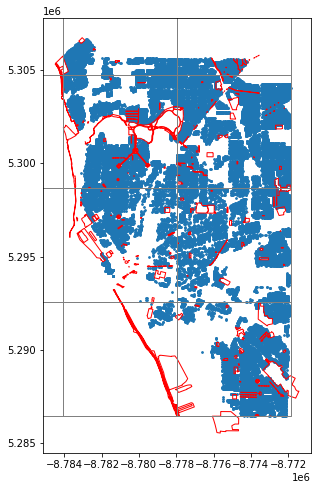

In [77]:
import matplotlib.pyplot as plt
ax = gdf_unique_houses.plot(markersize=3, figsize=(12, 8))
parks_df['geometry'].plot(ax = ax,facecolor="none", edgecolor = 'red')
plt.autoscale(False)
cell.plot(ax= ax,facecolor="none", edgecolor='grey')

In [50]:
gdf_unique_houses = gdf.drop_duplicates('sbl')['geometry']
cell, grid_cells, matrix_cells, indexes, cell_size = cell_formation(gdf_unique_houses, n_cells = 22)
print("THE CELL SIZES ARE:" + str(cell_size))
print(len(cell))

THE CELL SIZES ARE:554.3870498003777
874


In [38]:
99*9

891

In [30]:
10*6

60

In [31]:
5*5

25